# ELEN0016 - Computer Vision 
## Project Part. 2 - Ellipse matching and performance assessment 
Antoine Rousseau, François Blistein, Renaud Vandeghen, Alexandre Lhoest (group 7)

## 1. Description of the work

The aim of the project is to develop modules to detect/match ellipses in images and to assess the performances of this modules. The image database is composed of two different types of images : 

  -  Annotated line images (sudoku, soccer and road)
  -  Annotated ellipse images :  soccer field images where one will have to extract the white circles of the field marking (one central and two side half-circles) and eye infra-red images where one will have to find the pupil. 

The global work is subdivided into four tasks : 

  -  Task 2.1 : performance assessment of line segment detection. The task is to assess the performances of the line detection modules developed during the first part of the project. To do so, one will describe the metrics used and present the obtained results on these annotated images.
  -  Task 2.2 : ellipse matching. The main objective is to detect and local elliptical structures in images using Machine Learning. Practically, two programs have to be developed : 
     - For the pupil of the eyes images, the output must be the regression parameters of the detected ellipse ;
     - For the soccer images, the output must be the bounding box of the (1,2 or 3) detected ellipses. 
  -  Task 2.4 : performance assessment of the ellipse matching module. The goal is to assess the performances of the ellipse detection and matching module. To do so, one will describe the metrics used and present the obtained results on these annotated images. Practically, there are three quantitative assessments to measure quality of : 
     - [Classification Task] The detection of ellipses in input images ;
     - [Regression task on bounding boxes] The obtained position of the bounding boxes of the circles of the field marking in soccer images ;
     - [Regression task on ellipse parameters] The obtained parameters of the ellipes for the pupils in eye images. 


## Task 2.1 : performance assessment of line segment detection

During the first part of the project, the goal was to find efficient ways to extract and detect lines in five types of images : Building, PCB, Soccer, Road and Sudoku. For this purpose, some preprocessing methods were applied to the images (GaussianBlur...), then one applied edges detection method such as Canny or AdaptiveThreshold and, finally, one could increase the quality of the detections using postprocessing methods as dilation. By the end of this first part of the projet, one was able to classify edge pixels as being part of a line or not. This will be the basis of the performance assessment. 

Indeed, one wants to assess the performance of line segment detection developed before. To do so, a database of annotated lines images (sudoku, soccer and road) are provided. One will evaluate the performance as follows : 
  -  Based on confusion matrix definition, one will compare the line segment detection module with the annotations. For the edge pixels assumed to be part of a line segment, one will check if they belong actually to an annotated lines. If so, it will count for a true positive pixel. If not, it will count for a false positive pixels. In the same idea, a true negative pixel is a non-edge pixel that is actually annotated as being a non-edge pixel. Conversly, a false negative pixel is a non-edge pixel that is annotated to belong to a line. In order to have relative results, those number of true/false positive/negative pixels will be divided by the total number of edge pixels computed during the first part of the project. 
  -  Another qualitative way to assess the performance of line segment detection is to compare the detected lines at the Hough Line Transform output and the annotated lines. The goal will be to count the number of Hough lines that correspond to true lines. In order to do so, one will compare the number of pixels that belong to both a Hough Line and annotated lines. Thanks to this, it will be chosen if it actually represents the same line (with a tolerance parameter called alpha, tuned by hand for each different image types). This assessment method is less precised than the first one, but it gives a complementary evaluation. 

In order to get consistent results, the two methods are applied to the full image datasets for the three types of images. The edge detection methods developped during the first part of the project are assumed to be good if they give high percentage of true positive pixels and true negative pixels. The results are given below. It is not surprising to see that the sudoku images have the best results. It was actually the easiest type of images to process. For soccer and road images, the percentage of true positive pixels is lower. This is not so surprising. Indeed, during the first part of the project, one decided mainly to reject all the false lines that were detected by the method. This makes that lots of the true lines were also rejected. Therefore, if one looks at the percentage of true negative pixels, the percentages are way better in the case of soccer and road images. 

Finally, it will appear interesting to look at the impact of the dilation postprocessing on the performance assessment. This means, what happens if one dilates the detected edges by a factor 2, 3, 4,... In order to visualize it, one will generate the ROC curve associated to this. In a sense, it the dilation is performed with a factor 0, this means that the program will detect no true positive pixels and no false positive (0,0). If the dilation is performed with a factor really huge, the dilation will make the program will never detect any true negative or false negative pixels (1,1). The resulting plots are given below. 

### Sudoku images 

In [1]:
%matplotlib inline

In [2]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import Codes.tools                     # A few helpers to plot multiple images
import pandas as pd
from Codes.Part1.sudoku_lines import sudoku_lines_eval, roc_curve_sudoku
from Codes.Part1.road_lines import road_lines_eval, roc_curve_road
from Codes.Part1.soccer_lines import soccer_lines_eval, roc_curve_soccer

In [3]:
dilation_parameter = 1

true_pos, false_pos, true_neg, false_neg, lines_detected = sudoku_lines_eval(dilation_parameter)
print("Pourcent of true positive pixels = ", true_pos, "%")
print("Pourcent of false negative pixels = ", false_neg, "%")

print("Pourcent of true negative pixels = ", true_neg, "%")
print("Pourcent of false positive pixels = ", false_pos, "%")

print(lines_detected,"% of the Hough lines are real lines")

Pourcent of true positive pixels =  82.97031171149565 %
Pourcent of false negative pixels =  17.029688288504357 %
Pourcent of true negative pixels =  58.42498717441534 %
Pourcent of false positive pixels =  41.575012825584636 %
57.80416945849964 % of the Hough lines are real lines


### Soccer images 

In [4]:
dilation_parameter = 1

true_pos, false_pos, true_neg, false_neg, lines_detected = soccer_lines_eval(dilation_parameter)
print("Pourcent of true positive pixels = ", true_pos, "%")
print("Pourcent of false negative pixels = ", false_neg, "%")

print("Pourcent of true negative pixels = ", true_neg, "%")
print("Pourcent of false positive pixels = ", false_pos, "%")

print(lines_detected,"% of the Hough lines are real lines")

Pourcent of true positive pixels =  58.27811128828579 %
Pourcent of false negative pixels =  41.721888711714186 %
Pourcent of true negative pixels =  88.0296583272244 %
Pourcent of false positive pixels =  11.970341672775563 %
28.213580228920826 % of the Hough lines are real lines


### Road images

In [5]:
dilation_parameter = 1

true_pos, false_pos, true_neg, false_neg, lines_detected = road_lines_eval(dilation_parameter)
print("Pourcent of true positive pixels = ", true_pos, "%")
print("Pourcent of false negative pixels = ", false_neg, "%")

print("Pourcent of true negative pixels = ", true_neg, "%")
print("Pourcent of false positive pixels = ", false_pos, "%")

print(lines_detected,"% of the Hough lines are real lines")

Pourcent of true positive pixels =  15.217347377989555 %
Pourcent of false negative pixels =  84.78265262201043 %
Pourcent of true negative pixels =  98.95776108948853 %
Pourcent of false positive pixels =  1.0422389105114855 %
17.856298535780077 % of the Hough lines are real lines


### ROC curves 


The ROC curve in the case of the Sudoku and Soccer images show that a dilation does increase the true and false positive rates (dilation parameter going from 1 to 5). The first peak of the curve corresponds to a dilation of 1, then the two rates tend to increase. However, the false positive rate increases much faster than the true postive rate, which makes that it is better, in this case, to keep the dilation parameter equal to 1. This is sensible. In fact, increasing the width of the lines increase both the rate of the true positive pixels and the rate of the false negative pixels. 

However, in the case of the Road images, it appears that a dilation is really good to increase the true positive rate, as the false positive rate remains really low. So, the range of dilation_parameters is larger than for the previous cases (dilation parameter in [1,5,10,15,20]). From the curve, one can observe that a dilation parameter equal to 15 could be great to increase the performance of the line segment detection of this type of images. Beyong this value, the rate of false positive becomes too important.

#### Sudoku

[0, 0.8297031171149566, 0.8398890244732136, 0.8414094694394209, 0.8467352395296139, 0.8504089798330141, 1]
[0, 0.41575012825584634, 0.42935308875556155, 0.46651282997506255, 0.4896498739035927, 0.5099147455221948, 1]


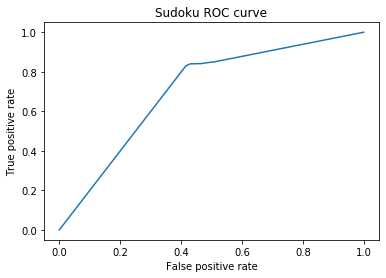

In [6]:
true_pos_vector,false_pos_vector = roc_curve_sudoku()

print(true_pos_vector)
print(false_pos_vector)

plt.title("Sudoku ROC curve")
plt.plot(false_pos_vector, true_pos_vector)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


#### Soccer

[0, 0.5827811128828579, 0.5859843449179569, 0.5943287341634863, 0.5954365361269786, 0.6014537570001681, 1]
[0, 0.11970341672775563, 0.12080249557766135, 0.12996627034146258, 0.1410537528557999, 0.1522577975927, 1]


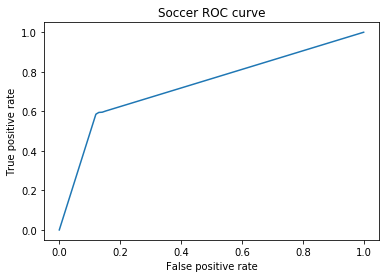

In [7]:
true_pos_vector,false_pos_vector = roc_curve_soccer()

print(true_pos_vector)
print(false_pos_vector)

plt.title("Soccer ROC curve")
plt.plot(false_pos_vector, true_pos_vector)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

#### Road

[0, 0.15217347377989554, 0.23763016695314204, 0.27515232997823097, 0.2894563091140171, 0.29819708762610714, 1]
[0, 0.010422389105114855, 0.022676664881379822, 0.03507292204387295, 0.045290004188122415, 0.05439904028932297, 1]


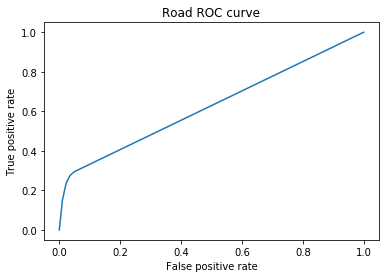

In [8]:
true_pos_vector,false_pos_vector = roc_curve_road()

print(true_pos_vector)
print(false_pos_vector)

plt.title("Road ROC curve")
plt.plot(false_pos_vector, true_pos_vector)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## Task 2.2 : ellipse matching

In this task, the main objectives are the detection of the number of ellipses on the eyes and soccer images but also to provide accurate values for their parameters, such as their location, orientation and size. 


### Data processing
For the soccer images, based on the annotations, a bounding box enclosing all ellipse points is computed. Then the parameters of the bounding box (i.e. center coordinates, lengthn height) are fed as input to the YOLO neural network after being normalized as a function of the image dimensions)

For the eye images, based on the annotations, an ellipse is fitted using the cv2.fitEllipse function. Then a binary mask image is created by drawing the (filled) resulting ellipse in white on a black image. These masks are then fed as input to the UNET neural network.

Some preprocessing was also realized for the eye images. However, this may not be necessary since we can consider that the first layers of the neural network actually do the job of preprocessing, by blurring the image for instance. The preprocessing used consists in a median blur with a kernel size of 5 and an erosion with a kernel size of 5. We noticed that this processing allows to blur the eyelashes, which is quite useful for all the photos where the eyelashes cover part of the pupil and therefore induce some noise, which can be reduced this way. This preprocessing also allowed to decrease the noise induced by the reflection of light visible on the eye as a white dot. This white dot, when present on the pupil, induces some noise. The preprocessing allow to attenuate th 



### Soccer images

For the soccer images, we decide to use the network Yolo to classify the ellipses on the soccer images. You Only Look Once (YOLO) is a pretrained classifier for object detection using a bounding box. We have used the configuration YOLOv3 with some modifications so that YOLO only detects the ellipses of the soccer field in a reasonable time according to the capacity of our GPU.

Our dataset have been randomly split into the training set, the validation set and the test set that contains 70%, 20% and 10% of the soccer images, respectively.

## Task 2.4 :  performance assessment of the ellipse matching module